In [1]:
suppressPackageStartupMessages({

    library(VariantAnnotation)
    library(tidyverse)
    library(magrittr)
    library(here)
    library(bdkn)
    library(rtracklayer)

})

In [2]:
devtools::load_all(".")

Loading ychr


# Full Y capture

In [3]:
gt_full <- read_gt(here("data/vcf/merged_full.vcf.gz"))

In [5]:
samples_full <- read_info(gt_full)

In [7]:
tAfrRef_full <- calculate_tAfrRef(gt_full, samples_full)

In [10]:
filter(tAfrRef_full, emh == "ustishim") %>% group_by(afr) %>% summarise_at(vars(mut_rate, starts_with("tmrca")), mean)

afr,mut_rate,tmrca_ad,tmrca_f,tmrca_avg
S_Dinka_1,7.303452e-10,70941.93,69349.19,70145.56
S_Gambian_1,7.316987e-10,71880.86,68641.57,70261.21
S_Ju_hoan_North_1,7.275020e-10,104537.82,95647.17,100092.49
S_Mandenka_1,7.251100e-10,74288.73,69789.21,72038.97
S_Mbuti_1,7.279549e-10,73608.19,74893.45,74250.82
S_Yoruba_2,7.275214e-10,73464.66,69555.03,71509.84
a00,7.228527e-10,279009.05,238462.64,258735.85


In [11]:
tArchRef_full <- calculate_tArchRef(gt_full, samples_full, tAfrRef_full)

In [18]:
tArchRef_full %>% filter(afr == "a00") %>% group_by(arch) %>% summarise_at(vars(tmrca_arch, alpha, mut_rate), mean)

arch,tmrca_arch,alpha,mut_rate
den8,669697.6,2.588061,7.228527e-10
mez2,384877.1,1.487568,7.228527e-10
neand,374532.4,1.447750,7.228527e-10
spy1,388457.7,1.501758,7.228527e-10


# Full Y capture - removing C-T/G-A SNPs

In [19]:
gt_full_tv <- read_gt(here("data/vcf/merged_full.vcf.gz"), tv_only = TRUE)

In [20]:
tAfrRef_full_tv <- calculate_tAfrRef(gt_full_tv, samples_full)

In [21]:
filter(tAfrRef_full_tv, emh == "ustishim") %>% group_by(afr) %>% summarise_at(vars(mut_rate, starts_with("tmrca")), mean)

afr,mut_rate,tmrca_ad,tmrca_f,tmrca_avg
S_Dinka_1,4.866444e-10,73550.90,66996.22,70273.56
S_Gambian_1,4.877201e-10,72799.41,71044.05,71921.73
S_Ju_hoan_North_1,4.850916e-10,113854.19,96495.49,105174.84
S_Mandenka_1,4.826821e-10,75407.80,70277.16,72842.48
S_Mbuti_1,4.865116e-10,75201.04,74559.42,74880.23
S_Yoruba_2,4.883002e-10,74196.43,70970.26,72583.35
a00,4.814816e-10,305501.71,246949.70,276225.70


In [22]:
tArchRef_full_tv <- calculate_tArchRef(gt_full_tv, samples_full, tAfrRef_full_tv)

In [46]:
tArchRef_full_tv %>% group_by(arch) %>% summarise_at(vars(tmrca_arch, alpha, mut_rate), mean)

arch,tmrca_arch,alpha,mut_rate
comb_neand,343719.8,3.940613,4.854902e-10
den8,658646.3,7.637777,4.854902e-10
mez2,373074.7,4.316872,4.854902e-10
spy1,302175.8,3.442238,4.854902e-10


# Exome Y capture

In [15]:
gt_exome <- read_gt(here("data/vcf/merged_exome.vcf.gz"))

In [16]:
samples_exome <- sample_info(gt_exome)

In [17]:
tAfrRef_exome <- calculate_tAfrRef(gt_exome, samples_exome)

In [19]:
tArchRef_exome <- calculate_tArchRef(gt_exome, samples_exome, tAfrRef_exome)

In [70]:
tAfrRef_exome %>% filter(emh == "ustishim") %>% group_by(afr) %>% summarise_at(vars(mut_rate, starts_with("tmrca")), mean)

afr,mut_rate,tmrca_ad,tmrca_f,tmrca_avg
a00,8.882523e-10,238178.57,219971.94,229075.26
S_Dinka_1,8.656269e-10,72811.22,109637.76,91224.49
S_Gambian_1,8.771406e-10,86395.41,68992.35,77693.88
S_Ju_hoan_North_1,8.789377e-10,72596.94,122579.08,97588.01
S_Mandenka_1,8.908849e-10,86165.82,68609.69,77387.76
S_Mbuti_1,8.911874e-10,86165.82,68609.69,77387.76
S_Yoruba_2,8.952733e-10,72443.88,68609.69,70526.79


In [71]:
tArchRef_exome %>% group_by(arch) %>% summarise_at(vars(tmrca_arch, tmrca_avg, alpha, mut_rate), mean)

arch,tmrca_arch,tmrca_avg,alpha,mut_rate
comb_neand,Inf,102983.4,Inf,8.839004e-10
den8,630602.0,102983.4,6.678709,8.839004e-10
elsidron1,359870.7,102983.4,3.915499,8.839004e-10


In [72]:
tArchRef_exome %>% filter(afr == "a00", ref == "reference") %>% mutate(T = alpha * 275000)

arch,afr,ref,tmrca_arch,alpha,mut_rate,tmrca_ad,tmrca_f,tmrca_avg,a,b,c,d,e,f,total,p,T
elsidron1,a00,reference,293250,1.533333,8.504974e-10,202500,180000,191250,4,0,0,8,7,11,51965,0.2105263,421666.7
den8,a00,reference,446250,2.333333,8.504974e-10,202500,180000,191250,8,1,0,7,5,11,35861,0.4000000,641666.7
comb_neand,a00,reference,701250,3.666667,8.504974e-10,202500,180000,191250,4,0,0,1,2,12,21973,0.5714286,1008333.3


In [73]:
tArchRef_exome %>% filter(afr == "S_Mbuti_1", ref == "S_French_1") %>% mutate(T = alpha * 275000)

arch,afr,ref,tmrca_arch,alpha,mut_rate,tmrca_ad,tmrca_f,tmrca_avg,a,b,c,d,e,f,total,p,T
elsidron1,S_Mbuti_1,S_French_1,202500,3.857143,1.267355e-09,67500,37500,52500,10,0,0,4,3,11,52341,0.5882353,1060714
den8,S_Mbuti_1,S_French_1,262500,5.000000,1.267355e-09,67500,37500,52500,14,0,0,5,2,11,36127,0.6666667,1375000
comb_neand,S_Mbuti_1,S_French_1,315000,6.000000,1.267355e-09,67500,37500,52500,5,1,0,1,1,13,22145,0.7142857,1650000


# Lippold Y capture

In [23]:
gt_lippold <- read_gt(here("data/vcf/merged_lippold.vcf.gz"))

In [25]:
samples_lippold <- read_info(gt_lippold)

In [26]:
tAfrRef_lippold <- calculate_tAfrRef(gt_lippold, samples_lippold)

In [27]:
tArchRef_lippold <- calculate_tArchRef(gt_lippold, samples_lippold, tAfrRef_lippold)

In [28]:
tAfrRef_lippold %>% filter(emh == "ustishim") %>% group_by(afr) %>% summarise_at(vars(mut_rate, starts_with("tmrca")), mean)

afr,mut_rate,tmrca_ad,tmrca_f,tmrca_avg
S_Dinka_1,1.626528e-09,93663.16,60264.97,76964.06
S_Gambian_1,1.647795e-09,95184.29,118316.19,106750.24
S_Ju_hoan_North_1,1.644335e-09,104273.81,49821.65,77047.73
S_Mandenka_1,1.632670e-09,96554.54,118301.40,107427.97
S_Mbuti_1,1.633135e-09,97044.53,127079.29,112061.91
S_Yoruba_2,1.661920e-09,94964.79,116387.47,105676.13
a00,1.627305e-09,187017.66,126518.61,156768.13


In [31]:
tArchRef_lippold %>% filter(afr == "a00") %>% group_by(arch) %>% summarise_at(vars(tmrca_arch, tmrca_avg), mean)

arch,tmrca_arch,tmrca_avg
den8,382188.5,156768.1
elsidron2,241995.8,156768.1
neand,230748.4,156768.1


In [83]:
filter(tArchRef_lippold, ref == "reference", afr == "a00")

arch,afr,ref,tmrca_arch,alpha,mut_rate,tmrca_ad,tmrca_f,tmrca_avg,a,b,c,d,e,f,total,p,T
elsidron2,a00,reference,96015.41,1.417021,3.899139e-09,93103.45,42413.79,67758.62,49,2,12,163,72,94,435742,0.1725352,389680.9
den8,a00,reference,149922.62,2.212598,3.899139e-09,93103.45,42413.79,67758.62,77,2,4,79,48,88,316210,0.3774510,608464.6
comb_neand,a00,reference,99437.98,1.467532,3.899139e-09,93103.45,42413.79,67758.62,18,1,6,42,35,59,202292,0.1894737,403571.4


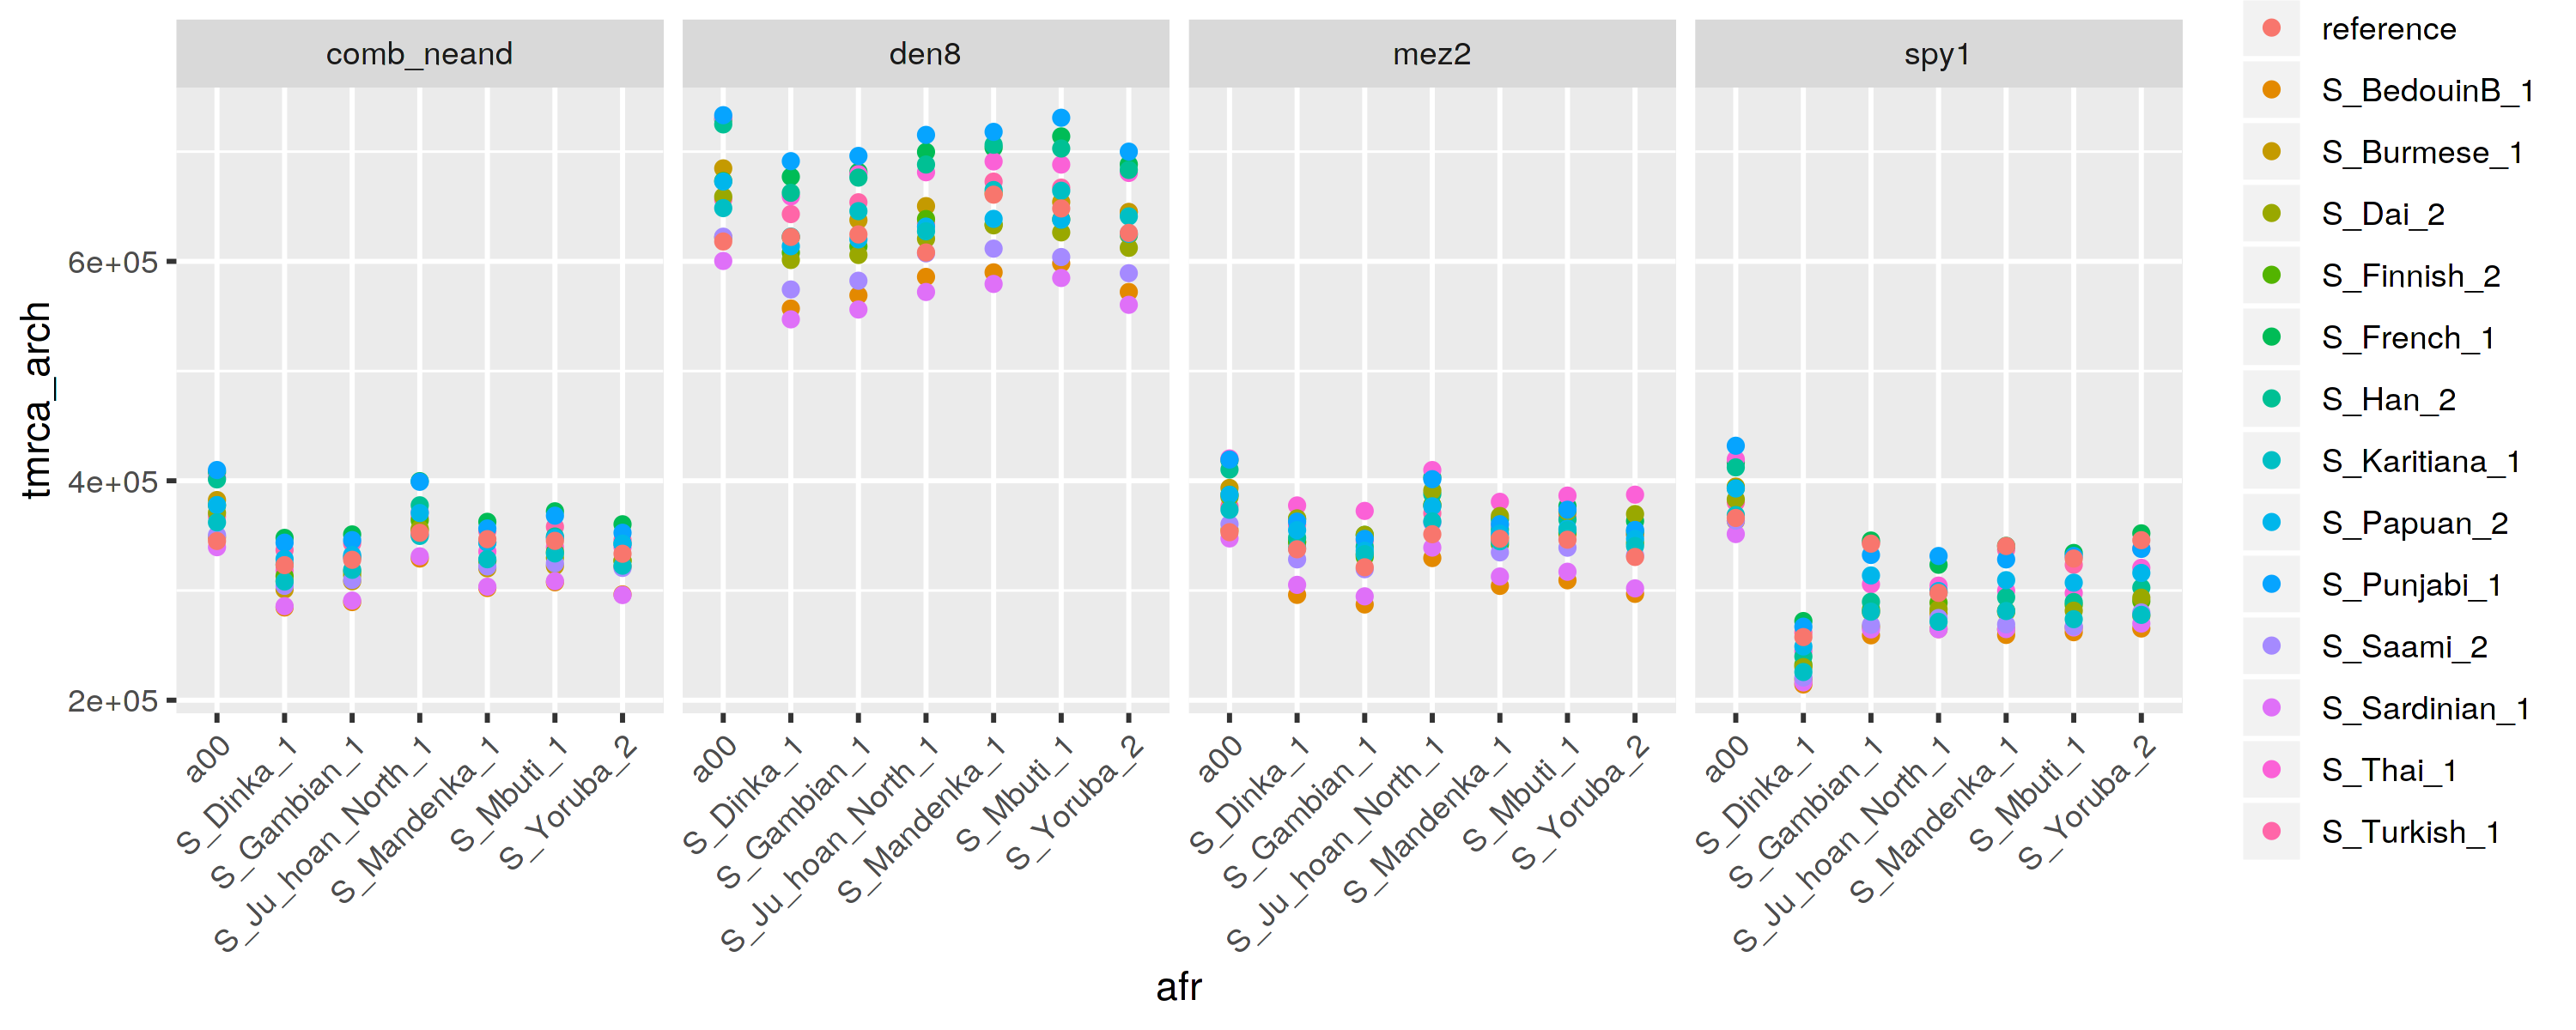

In [93]:
set_dim(10, 4, 300)

tArchRef_full %>%
ggplot(aes(afr, tmrca_arch, color = ref)) +
    geom_point() +
    facet_grid(~ arch) +
    theme(axis.text.x = element_text(hjust = 1, angle = 45))